# Reconnaissance de chiffres manuscrits avec MNIST

Dans ce notebook, nous allons construire et entraîner un modèle de réseau de neurones convolutifs (CNN) pour reconnaître des chiffres manuscrits en utilisant le jeu de données MNIST.

## Importation des bibliothèques nécessaires

Nous commençons par importer les bibliothèques nécessaires pour notre projet.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

## Chargement et prétraitement des données MNIST

Nous chargeons les données MNIST et les prétraitons pour les rendre compatibles avec notre modèle.

In [2]:
# Charger les données MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Prétraiter les données
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Construction du modèle

Nous construisons un modèle de réseau de neurones convolutifs (CNN) en utilisant l'API Keras de TensorFlow.

In [3]:
# Construire le modèle
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

c:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


## Compilation du modèle

Nous compilons le modèle en spécifiant l'optimiseur, la fonction de perte et les métriques à surveiller.

In [4]:
# Compiler le modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Configuration de l'Early Stopping

Nous configurons l'early stopping pour arrêter l'entraînement lorsque la performance sur l'ensemble de validation ne s'améliore plus.

In [5]:
# Configuration de l'Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Surveille la perte de validation
    patience=3,  # Nombre d'époques sans amélioration après lesquelles l'entraînement sera arrêté
    verbose=1,
    restore_best_weights=True  # Restaure les meilleurs poids trouvés
)

## Entraînement du modèle

Nous entraînons le modèle en utilisant les données d'entraînement et un ensemble de validation.

In [6]:
# Entraîner le modèle avec un ensemble de validation
historique = model.fit(train_images, train_labels, epochs=20, batch_size=64, 
                       validation_split=0.1,  # Ajout de cette ligne
                       callbacks=[early_stopping])

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8547 - loss: 0.4652 - val_accuracy: 0.9853 - val_loss: 0.0501
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9812 - loss: 0.0607 - val_accuracy: 0.9853 - val_loss: 0.0536
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9881 - loss: 0.0392 - val_accuracy: 0.9880 - val_loss: 0.0412
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9911 - loss: 0.0293 - val_accuracy: 0.9908 - val_loss: 0.0315
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9934 - loss: 0.0206 - val_accuracy: 0.9898 - val_loss: 0.0385
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9943 - loss: 0.0178 - val_accuracy: 0.9897 - val_loss: 0.0359
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9945 - loss: 0.0158 - val_accuracy: 0.9917 - val_loss: 0.0334
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 4.


## Évaluation du modèle

Nous évaluons le modèle sur les données de test pour vérifier sa performance.

In [7]:
# Évaluer le modèle
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9912 - loss: 0.0300
Test accuracy: 0.9923999905586243


# Affichage de l'historique de l'entraînement

Nous affichons l'historique de l'entraînement pour voir comment les métriques ont évolué au fil des époques.

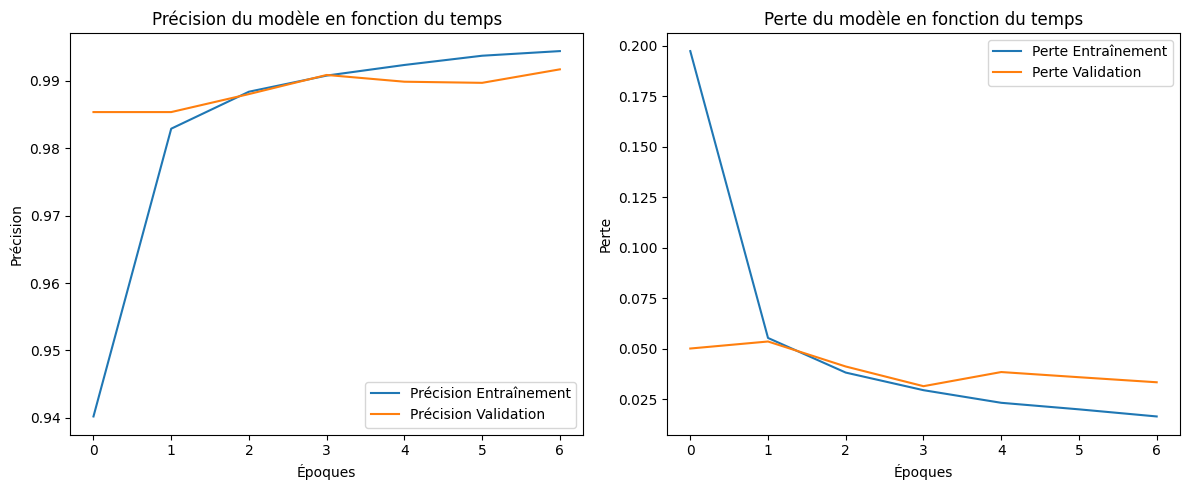

In [9]:
from utils import plot

plot(historique)

# Matrice de confusion

Nous affichons la matrice de confusion pour évaluer la performance du modèle sur chaque classe.

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


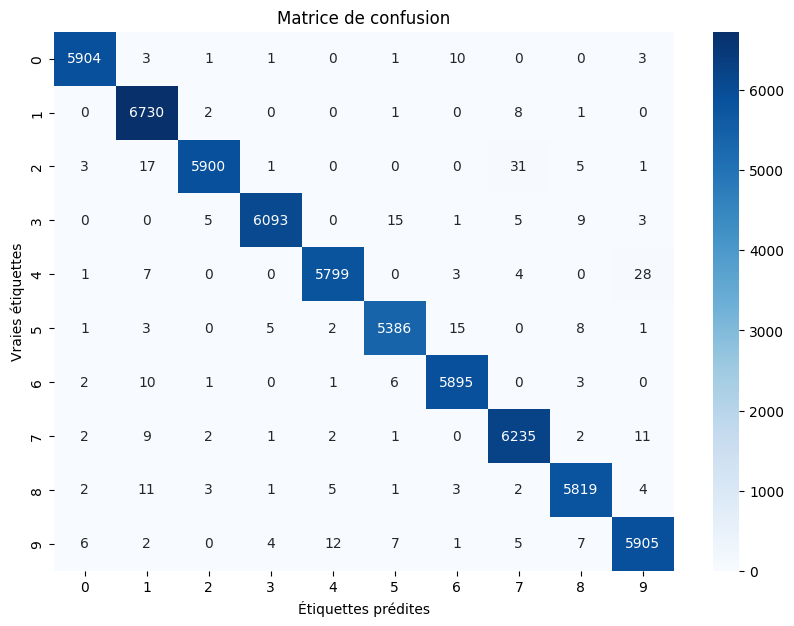

In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Prédire les étiquettes des données de test
y_pred = model.predict(train_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(train_labels, axis=1)

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_true, y_pred_classes)

target_names = range(10)

# Afficher la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title("Matrice de confusion")
plt.ylabel('Vraies étiquettes')
plt.xlabel('Étiquettes prédites')
plt.show()